# Importing Basic Libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

# Loading Dataset

In [58]:
adult_df=pd.read_csv(r'C:\Users\Mihir\Desktop\DATASETS\Adult dataset\adult_data.csv',header=None,delimiter=' *, *')

#delimiter used to remove all gaps and spaces and then save the dataframe

In [59]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
adult_df.shape

(32561, 15)

In [61]:
#assigning column headers to dataframe
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
#create a copy of the dataFrame
adult_df_rev=pd.DataFrame.copy(adult_df)

In [63]:
#dropping fnlwgt as it is irelevant domain-wise and education as there is another variable "education_num" same as "education"
adult_df_rev=adult_df_rev.drop(["education_num","fnlwgt"],axis=1)

In [64]:
adult_df_rev.shape

(32561, 13)

# Handling the Missing Values

In [65]:
adult_df_rev.isnull().sum() #no null data in 'na' form

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [66]:
adult_df_rev=adult_df_rev.replace(['?'], np.nan)

In [67]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [68]:
adult_df_rev.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

# Note-
mode is the central tendency which can be applied to categorical variable

In [69]:
for x in adult_df_rev.columns[:]:
    if  adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
         adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)

In [70]:
adult_df_rev.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [71]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Converting Categorical to Numerical

# Note-
SKLEARN does not accept categorical data,so we need to convert it into numeric.

In [72]:
#IDENTIFYING DATATYPES AS 'OBJECT' AND APPEND IT IN A NEW VARIABLE COLNAME[]

colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [73]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

#last three lines to view which level got which number assigned.

Feature workclass
mapping {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
Feature education
mapping {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
Feature marital_status
mapping {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
Feature occupation
mapping {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
Feature relationship
mapping {'Husband': 0, 'Not-in-family': 1, 'Other-r

In [74]:
adult_df_rev.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [75]:
adult_df_rev.shape

(32561, 13)

In [76]:
adult_df_rev.head()

#0--> <=50k
#1--> =50k

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,2,3,0,4,1,0,0,13,38,0
2,38,3,11,0,5,1,4,1,0,0,40,38,0
3,53,3,1,2,5,0,2,1,0,0,40,38,0
4,28,3,9,2,9,5,2,0,0,0,40,4,0


In [77]:
adult_df_rev.dtypes

age               int64
workclass         int32
education         int32
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [78]:
#seperate dependent and independent variables

X=adult_df_rev.values[:,:-1]
Y=adult_df_rev.values[:,-1]

# scaling the data

In [79]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

scalar.fit(X)   #FIT WILL TRAIN THE SCALAR OBJECT AND DECIDE UPN NEW RANGES TO BE APPLIED,

X=scalar.transform(X) 
#TRANSFORM WILL SEEK THE RANGES FROM THE SCALAR OBJECT WHICH WAS LEARNT,AND TRANSFORM THE ORIGINAL VALUES WITH SCALED VALUES.

print(X)


#x has now changed into float datatype.we need to convert y too into integer.

[[ 0.03067056  2.62429763 -0.33543693 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965 -0.33543693 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633  0.18133163 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633  0.18133163 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633  0.18133163 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166  0.18133163 ... -0.21665953 -0.03542945
   0.26136999]]


In [80]:
#CONVERTING Y INTO int Datatype.

Y=Y.astype(int)

# RUNNING A BASIC MODEL

# train-test split

In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# training and testing

In [82]:
from sklearn.linear_model import LogisticRegression
#creating a model
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

# predict the model

In [83]:
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

# displaying the coeffiicient and intercept

In [84]:
#displaying the coefficnet and intercept
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.44041074 -0.10399335  0.22773437 -0.3151228   0.0692492  -0.23932
   0.11448968  0.34513383  2.47572167  0.31252638  0.42916296  0.00343103]]
[-1.33406862]


# displaing confusion matrix and other metrics


In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print("CONFUSION MATRIX: ")
print(cfm)

print('Classification Report: ')

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

CONFUSION MATRIX: 
[[7086  337]
 [1598  748]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7423
           1       0.69      0.32      0.44      2346

    accuracy                           0.80      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.79      0.80      0.77      9769

Accuracy of the model:  0.8019244549083837


# adjusting the threshold
here,we are basically changing teh threshold from 0.5 to 0.45 manually.

In [86]:
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.95225464 0.04774536]
 [0.93476594 0.06523406]
 [0.25812403 0.74187597]
 ...
 [0.73454621 0.26545379]
 [0.87581325 0.12418675]
 [0.36226457 0.63773543]]


In [87]:
#appending the values in probability matrix to 0 and 1
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print("CONFUSION MATRIX: ")
print(cfm)

print('Classification Report: ')

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

CONFUSION MATRIX: 
[[6983  440]
 [1519  827]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      7423
           1       0.65      0.35      0.46      2346

    accuracy                           0.80      9769
   macro avg       0.74      0.65      0.67      9769
weighted avg       0.78      0.80      0.78      9769

Accuracy of the model:  0.7994677039615109


In [89]:
for a in np.arange(0.4,0.61,0.01):    #arange(include,exclude,steps)
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)  
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  #error=type1 error+type2 error
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
                cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 2015  , type 2 error : 1337  , type 1 error: 678
Errors at threshold  0.41000000000000003 : 2007  , type 2 error : 1380  , type 1 error: 627
Errors at threshold  0.42000000000000004 : 1988  , type 2 error : 1409  , type 1 error: 579
Errors at threshold  0.43000000000000005 : 1984  , type 2 error : 1442  , type 1 error: 542
Errors at threshold  0.44000000000000006 : 1975  , type 2 error : 1470  , type 1 error: 505
Errors at threshold  0.45000000000000007 : 1962  , type 2 error : 1493  , type 1 error: 469
Errors at threshold  0.4600000000000001 : 1959  , type 2 error : 1519  , type 1 error: 440
Errors at threshold  0.4700000000000001 : 1963  , type 2 error : 1550  , type 1 error: 413
Errors at threshold  0.4800000000000001 : 1947  , type 2 error : 1567  , type 1 error: 380
Errors at threshold  0.4900000000000001 : 1940  , type 2 error : 1583  , type 1 error: 357
Errors at threshold  0.5000000000000001 : 1935  , type 2 error : 1598  , type 1 error: 337
Errors at

In [90]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)
print(auc)

0.8114946873149157


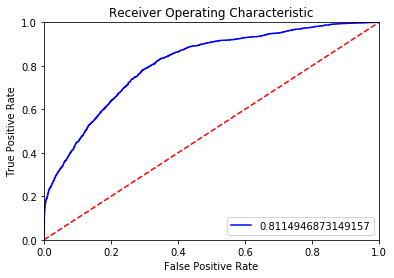

In [91]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [92]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)

0.646619846680538


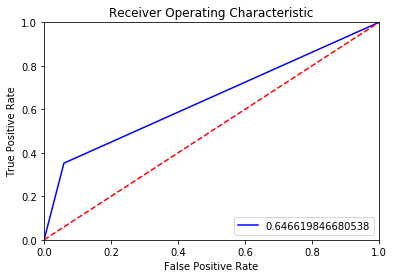

In [93]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# Note-
whEn we are confused between multiple thresholds,we can ind out AUC values for each of those thresholds and finally conclude upon that threshold value which gives us an AUC nearest to overall AUC.

## Saving the Model

In [94]:
import pickle
# open a file, where you want to store the data
file = open(r'C:\Users\Mihir\Desktop\Projects\ADULT Dataset logistic\adult_data.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)